In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import math

In [2]:
df = pd.read_csv("./data/cleaned_m1_data.csv")
df.head()

,FIPS,01_Cases,01_Deaths,01_ZHVI_Bot,01_ZHVI_Top,02_Cases,02_Deaths,02_ZHVI_Bot,02_ZHVI_Top,03_Cases,...,11_ZHVI_Top,12_Cases,12_Deaths,12_ZHVI_Bot,12_ZHVI_Top,County,Metro,SizeRank,State,StateName
0,6037,1,0.0,467097.0,1153112.0,1,0.0,471446.0,1162570.0,3011,...,1241930.0,770915,10345.0,511565.0,1251102.0,Los Angeles,Los Angeles-Long Beach-Anaheim,0,CA,California
1,17031,2,0.0,156681.0,430687.0,3,0.0,156772.0,430623.0,4496,...,446943.0,393652,8285.0,167255.0,449780.0,Cook,Chicago-Naperville-Elgin,1,IL,Illinois
2,48201,0,0.0,144662.0,345372.0,0,0.0,145031.0,345597.0,680,...,363318.0,237727,3402.0,156392.0,366981.0,Harris,Houston-The Woodlands-Sugar Land,2,TX,Texas
3,4013,1,0.0,212378.0,465948.0,1,0.0,214104.0,468857.0,791,...,520462.0,322449,5125.0,245767.0,528966.0,Maricopa,Phoenix-Mesa-Scottsdale,3,AZ,Arizona
4,6073,0,0.0,448466.0,952309.0,1,0.0,451422.0,957636.0,734,...,1037195.0,155658,1534.0,501409.0,1052488.0,San Diego,San Diego-Carlsbad,4,CA,California


In [4]:
# The spread of the pandemic, visualized

fig = ff.create_choropleth(fips=df['FIPS'], values=df['04_Cases'])
fig.update_layout(showlegend=False)
fig.show()

fig = ff.create_choropleth(fips=df['FIPS'], values=df['08_Cases'])
fig.update_layout(showlegend=False)
fig.show()

fig = ff.create_choropleth(fips=df['FIPS'], values=df['12_Cases'])
fig.update_layout(showlegend=False)
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

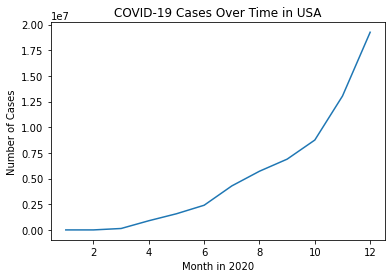

In [17]:
plt.plot(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [df["01_Cases"].sum(), df["02_Cases"].sum(), df["03_Cases"].sum(), df["04_Cases"].sum(), df["05_Cases"].sum(), df["06_Cases"].sum(), df["07_Cases"].sum(), df["08_Cases"].sum(), df["09_Cases"].sum(), df["10_Cases"].sum(), df["11_Cases"].sum(), df["12_Cases"].sum()]
)
plt.xlabel('Month in 2020')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Over Time in USA')
plt.show()

In [ ]:
def get_labels(suffix):
    labs = []
    for i in range(1,10):
        labs.append('0' + str(i) + suffix)
    for i in range(10,13):
        labs.append(str(i) + suffix)
    return labs

In [ ]:
x = range(1,12)
t = [df[lab].mean() for lab in get_labels('_ZHVI_Top')]
b = [df[lab].mean() for lab in get_labels('_ZHVI_Bot')]
d_t, d_b = [], []

for i in range(1,12):
    d_t.append((t[i]/t[i-1])**12)
    d_b.append((b[i]/b[i-1])**12)
    
plt.plot(x,d_t, color='green')
plt.plot(x,d_b, color='blue')
plt.xticks(range(1,12))
plt.xlabel('Months of 2020')
plt.ylabel('Home Price Monthly CAGR')
plt.show()

In [ ]:
plt.scatter(df["FIPS"], df["01_ZHVI_Bot"])
plt.xlabel('FIPS')
plt.ylabel('ZHIV')
plt.title('1/31/2020 Bottom Tier Homes')
plt.show()

In [ ]:
plt.scatter(df["FIPS"], df["01_ZHVI_Top"])
plt.xlabel('FIPS')
plt.ylabel('ZHIV')
plt.title('1/31/2020 Top Tier Homes')
plt.show()

In [ ]:
plt.scatter(df["FIPS"], df["08_ZHVI_Bot"])
plt.xlabel('FIPS')
plt.ylabel('ZHIV')
plt.title('8/31/2020 Bottom Tier Homes')
plt.show()

In [ ]:
plt.scatter(df["FIPS"], df["08_ZHVI_Top"])
plt.xlabel('FIPS')
plt.ylabel('ZHIV')
plt.title('8/31/2020 Top Tier Homes')
plt.show()